# IN THIS PROJECT, I CARRIED OUT AN ANALYSIS OF ALL MY FACEBOOK POSTS SINCE I JOINED THE SOCIAL MEDIA APP. 
## FACEBOOK MAKES IT EASIER  TO DOWNLOAD ALL YOUR DATA SINCE YOU STARTED USING IT.

In [2]:
#import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (40, 20)})
sns.set(font='sans-serif')
sns.set(font_scale=5)

In [3]:
fb_data=pd.read_json('your_posts_1.json')

In [4]:
fb_data.head(3)

,timestamp,attachments,data,title,tags
0,2020-11-07 06:56:18,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'The Words That Make The Threads Na...,NaN,NaN
1,2020-11-07 05:47:23,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'But just what is Power BI? Power B...,NaN,NaN
2,2020-11-04 09:48:49,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'The data revolution is here and has...,NaN,NaN


In [5]:
fb_data.tail(3)

,timestamp,attachments,data,title,tags
503,2011-07-17 19:02:11,[{'data': [{'media': {'uri': 'photos_and_video...,NaN,NaN,NaN
504,2011-07-16 21:02:20,[{'data': [{'media': {'uri': 'photos_and_video...,NaN,NaN,NaN
505,2011-07-15 11:23:41,[{'data': [{'media': {'uri': 'photos_and_video...,NaN,NaN,NaN


In [6]:
#Rename the timestamp column to date
fb_data.rename(columns={'timestamp':'date'},inplace=True)

In [7]:
#Check the DataFrame
fb_data.head(3)

,date,attachments,data,title,tags
0,2020-11-07 06:56:18,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'The Words That Make The Threads Na...,NaN,NaN
1,2020-11-07 05:47:23,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'But just what is Power BI? Power B...,NaN,NaN
2,2020-11-04 09:48:49,[{'data': [{'media': {'uri': 'photos_and_video...,[{'post': 'The data revolution is here and has...,NaN,NaN


In [8]:
#Drop some unnecessary columns
fb_data.drop(['attachments','title','tags'],axis=1)

,date,data
0,2020-11-07 06:56:18,[{'post': 'The Words That Make The Threads Na...
1,2020-11-07 05:47:23,[{'post': 'But just what is Power BI? Power B...
2,2020-11-04 09:48:49,[{'post': 'The data revolution is here and has...
3,2020-10-18 19:09:04,[{'post': 'I have chronicled the effort of the...
4,2020-10-18 09:14:14,[{'post': 'I have chronicled the effort of the...
...,...,...
501,2011-07-21 23:53:58,[{'post': 'Show me a thoroughly satisfied man ...
502,2011-07-21 23:47:58,[{'post': 'What a paradox the more you look th...
503,2011-07-17 19:02:11,NaN
504,2011-07-16 21:02:20,NaN


In [9]:
#Makin sure it is datetime format
pd.to_datetime(fb_data['date'])

0     2020-11-07 06:56:18
1     2020-11-07 05:47:23
2     2020-11-04 09:48:49
3     2020-10-18 19:09:04
4     2020-10-18 09:14:14
              ...        
501   2011-07-21 23:53:58
502   2011-07-21 23:47:58
503   2011-07-17 19:02:11
504   2011-07-16 21:02:20
505   2011-07-15 11:23:41
Name: date, Length: 506, dtype: datetime64[ns]

In [10]:
print(fb_data.shape)

(506, 5)


In [15]:
fb_data=fb_data.set_index('date')

In [16]:
post_counts=fb_data['data'].resample('MS').size()

In [17]:
post_counts.head()

date
2011-07-01    9
2011-08-01    4
2011-09-01    5
2011-10-01    4
2011-11-01    4
Freq: MS, Name: data, dtype: int64

## Visualizing my Facebook usage


In [18]:
#set x labels 
x_labels=post_counts.index

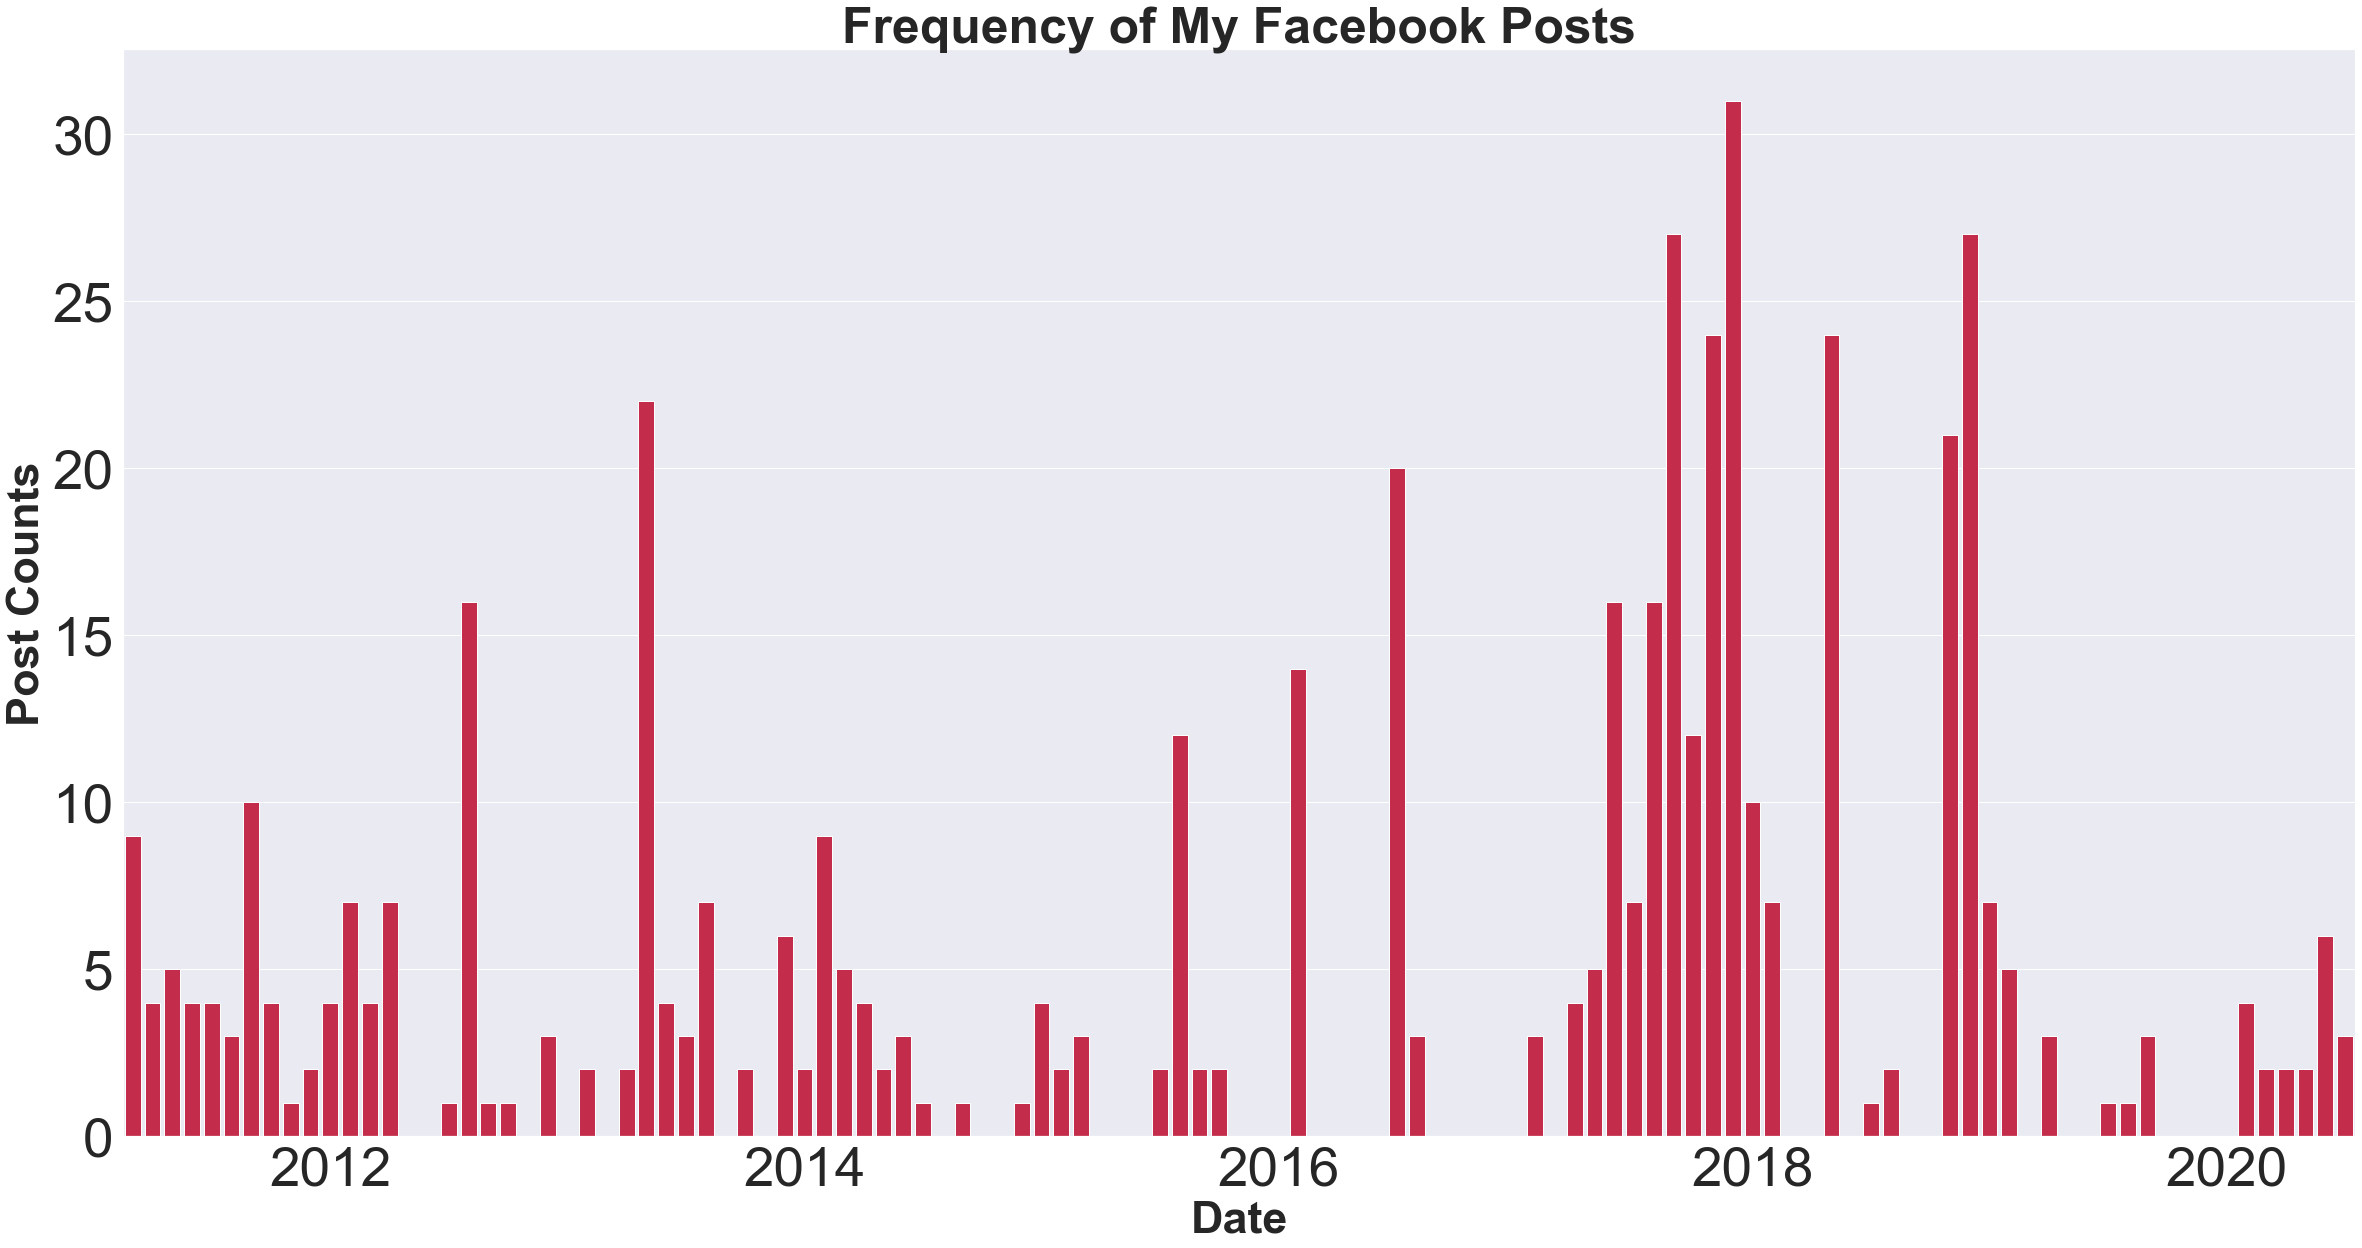

In [31]:
#Create bar plot 
sns.barplot(x_labels,post_counts,color='crimson')
#Only show x-axis label for January 1 of every other year
tick_positions=np.arange(10, len(x_labels),step=24)
plt.title('Frequency of My Facebook Posts',fontweight='bold',fontsize=50)
plt.ylabel("Post Counts",fontweight='bold',fontsize=45)
plt.xlabel("Date",fontweight='bold',fontsize=45)
plt.xticks(tick_positions,x_labels[tick_positions].strftime("%Y"));